# Proyecto integrador para el Módulo de analista de Datos - ISPC
### Grupo: *DataBring*
#### N° Grupo: *5*
#### Integrantes:
- Bendezu, Ana Valentina
- Blasiche, Andrés
- Cabrera,Marcos Rodrigo
- Palomeque, Dalila Macarena
- Palomeque, Jonatan Manuel
- Tejeda, Romina Soledad

#### Módulo: Analista de datos (Estádistica y Exploración de datos, Ciencia de Datos y Procesamiento de Datos)
#### Carrera: Tecnicatura Superior en Ciencia de datos e IA
#### Institución: Instituto Superior Politécnico Córdoba (ISPC)
#### Año: 2024

## Descripción:


#### Importar Librerias:

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, skew
import seaborn as sns


#### Cargar DataSet y crear el Dataframe:

In [165]:
dataSet = pd.read_csv('ds_ventas.csv')

dataframe = pd.DataFrame(dataSet)

#### Imprimir los primeros  10 registros del dataframe:

In [166]:
print(dataframe.head(10))

        pais   metodo_orden      tipo_comercio     linea tipo_producto  \
0  Argentina  Representante          Mayorista  Mascotas      Juguetes   
1  Argentina           Mail      De proximidad  Mascotas      Juguetes   
2  Argentina       Teléfono  Grandes Almacenes  Infantil       Calzado   
3  Argentina        Website      Especializado    Hombre       Calzado   
4  Argentina        Website      Especializado   Adultos    Vestimenta   
5  Argentina        Website          Mayorista     Mujer        Lentes   
6  Argentina       Teléfono      Especializado     Mujer    Vestimenta   
7  Argentina  Representante       Hipermercado    Hombre        Lentes   
8  Argentina  Representante  Grandes Almacenes  Mascotas      Juguetes   
9  Argentina  Representante          Mayorista    Hombre       Calzado   

                 producto   año cuatrimestre       ventas  cantidad  \
0        Anitibyx armatus  2019      C1 2019  $155.040,02  15.562,0   
1      Sarcorhamphus papa  2019      C1 201

#### Descripcion del DataSet:

Cantidad de registros y columnas:

In [167]:
cant_filas, cant_columnas = dataframe.shape

In [168]:
print(f"Cantidad de registros: {cant_filas}. Cantidad de columnas: {cant_columnas}")

Cantidad de registros: 12000. Cantidad de columnas: 13


Cantidad de elementos que NO son nulos:

In [169]:
dataframe.count()

pais                12000
metodo_orden        12000
tipo_comercio       12000
linea               12000
tipo_producto       12000
producto            12000
año                 12000
cuatrimestre        12000
ventas              12000
cantidad            12000
utilidad_bruta_p    12000
utilidad_bruta      12000
costos              12000
dtype: int64

Tipos de Datos:

In [170]:
tipos_datos = dataframe.dtypes
print(tipos_datos)

pais                object
metodo_orden        object
tipo_comercio       object
linea               object
tipo_producto       object
producto            object
año                  int64
cuatrimestre        object
ventas              object
cantidad            object
utilidad_bruta_p    object
utilidad_bruta      object
costos              object
dtype: object


##### Cambiar columnas NUMERICAS (ventas, cantidad, utilidad_bruta y costos y utilidad_bruta_p ) a tipo flotante:
- Un registro de esta columna, originalmente tiene la siguiente sintaxis: "$155.040,02" y necesito que queden de la siguiente forma: "155040.02" , para poder obtener las medidas de tendencias centrales (media, mediana).
  
- Para hacerlo, primero debo eliminar los signos "$", las "," y finalmente reemplazar los "." por "," Ya que sino, no puedo cambiar el tipo de dato.

Reemplazar los signos "$" de las columnas: ventas, , 'utilidad_bruta', 'costos'

In [171]:
dataframe['ventas'] = dataframe['ventas'].str.replace('$', '')
dataframe['utilidad_bruta'] = dataframe['utilidad_bruta'].str.replace('$', '')
dataframe['costos'] = dataframe['costos'].str.replace('$', '')

Reemplazar los signos "." de las columnas:ventas, , 'utilidad_bruta', 'costos' y 'cantidad'

In [172]:
dataframe['ventas'] = dataframe['ventas'].str.replace('.', '')
dataframe['utilidad_bruta'] = dataframe['utilidad_bruta'].str.replace('.', '')
dataframe['costos'] = dataframe['costos'].str.replace('.', '')
dataframe['cantidad'] = dataframe['cantidad'].str.replace('.', '')

Reemplazar los signos "," por "." de las columnas:ventas, , 'utilidad_bruta', 'costos' y 'cantidad'

In [173]:
dataframe['ventas'] = dataframe['ventas'].str.replace(',', '.')
dataframe['utilidad_bruta'] = dataframe['utilidad_bruta'].str.replace(',', '.')
dataframe['costos'] = dataframe['costos'].str.replace(',', '.')
dataframe['cantidad'] = dataframe['cantidad'].str.replace(',', '.')

Reemplazar los signos "%" por "" y "." por "," de la columna "utilidad_bruta_p"

In [174]:
dataframe['utilidad_bruta_p'] = dataframe['utilidad_bruta_p'].str.replace('%','')
dataframe['utilidad_bruta_p'] = dataframe['utilidad_bruta_p'].str.replace(',','.')

Reemplazar '.00'  y '.0' por '' en la columna 'cantidad' para poder pasarla a int

In [175]:
dataframe['cantidad'] = dataframe['cantidad'].str.replace('.00', '')
dataframe['cantidad'] = dataframe['cantidad'].str.replace('.0', '')

Ahora si, puedo convertir cambiar el tipo de dato:

In [176]:
dataframe[['ventas', 'utilidad_bruta', 'costos', 'utilidad_bruta_p']] = dataframe[['ventas', 'utilidad_bruta', 'costos', 'utilidad_bruta_p']].astype(float)
dataframe['cantidad'] = dataframe['cantidad'].astype(int)

##### Verificar los cambios de tipo de datos:

In [177]:
tipos_datos = dataframe.dtypes
print(tipos_datos)

pais                 object
metodo_orden         object
tipo_comercio        object
linea                object
tipo_producto        object
producto             object
año                   int64
cuatrimestre         object
ventas              float64
cantidad              int32
utilidad_bruta_p    float64
utilidad_bruta      float64
costos              float64
dtype: object


#### Eliminar filas con datos vacios:

In [178]:
nuevo_df = dataframe.dropna()

In [179]:
ncant_filas, ncant_columnas = nuevo_df.shape


In [180]:
print(f"Cantidad de registros: {ncant_filas}. Cantidad de columnas: {ncant_columnas}")

Cantidad de registros: 12000. Cantidad de columnas: 13


#### Análisis de columnas:

0- Informacion estadistica del dataset:

In [181]:
infoEstadistica = nuevo_df.describe()
infoEstadistica.round(2)

,año,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,2019.99,138002.35,9003.64,49.90,68869.50,69132.85
std,0.82,27302.38,4898.64,14.78,24830.89,24825.51
min,2019.00,90530.25,526.00,24.58,22407.08,22339.56
25%,2019.00,114447.00,4753.75,37.16,49109.52,49466.04
50%,2020.00,137773.08,8992.50,49.71,66373.34,66495.02
75%,2021.00,161716.90,13238.25,62.90,85758.04,86436.72
max,2021.00,185644.24,17521.00,75.40,138447.51,139072.81


1- Columnas Numericas:

Media:

In [182]:
# media de Ventas:
media_ventas = nuevo_df['ventas'].mean()

# media de Cantidad de productos:
media_cant_productos = nuevo_df['cantidad'].mean()

# media de Utilidad Bruta:
media_utilidad_bruta = nuevo_df['utilidad_bruta'].mean()

# media de costos:
media_costos =  nuevo_df['costos'].mean()


print("""
La media de ventas es: ${} 
La media de la cantidad de productos es: {} 
La media de utilidades brutas es: ${} 
La media de costos es: ${}
""".format(media_ventas.round(2), media_cant_productos.round(2), media_utilidad_bruta.round(2), media_costos.round(2)))


La media de ventas es: $138002.35 
La media de la cantidad de productos es: 9003.64 
La media de utilidades brutas es: $68869.5 
La media de costos es: $69132.85



Mediana:

In [183]:
# mediana de Ventas:
mediana_ventas = nuevo_df['ventas'].median()

# mediana de Cantidad de productos:
mediana_cant_productos = nuevo_df['cantidad'].median()

# mediana de Utilidad Bruta:
mediana_utilidad_bruta = nuevo_df['utilidad_bruta'].median()

# mediana de costos:
mediana_costos =  nuevo_df['costos'].median()


print("""
La mediana de ventas es: ${} 
La mediana de la cantidad de productos es: {} 
La mediana de utilidades brutas es: ${} 
La mediana de costos es: ${}
""".format(mediana_ventas, mediana_cant_productos, mediana_utilidad_bruta, mediana_costos))


La mediana de ventas es: $137773.085 
La mediana de la cantidad de productos es: 8992.5 
La mediana de utilidades brutas es: $66373.345 
La mediana de costos es: $66495.01999999999



Desviacion Estandar:

In [184]:
# Desviacion estándar en ventas:
desviacion_ventas = nuevo_df['ventas'].std()

#Desviación estándar de Cantidad de Productos:
desviacion_cant_productos = nuevo_df['cantidad'].std()

#Desviación estándar de utilidad bruta:
desviacion_utilidad_bruta = nuevo_df['utilidad_bruta'].std()

#Desviacion estándar de costos:
desviacion_costos = nuevo_df['costos'].std()

print("""
La desviación stándar de ventas es: ${}\n
La Desviación estándar de cantidad de productos es: {}\n
La desviación estándar de utilidad bruta es: {}\n
La desviacion estandar de costos es: {}""".format(desviacion_ventas,desviacion_cant_productos,desviacion_utilidad_bruta,desviacion_costos))


La desviación stándar de ventas es: $27302.379835173364

La Desviación estándar de cantidad de productos es: 4898.644051538761

La desviación estándar de utilidad bruta es: 24830.89167595553

La desviacion estandar de costos es: 24825.51308325469


#### Se ordena el dataset por nombre de pais, fecha y cuatrimestre

In [185]:
df_sort = nuevo_df.sort_values(by=['pais', 'año', 'cuatrimestre'])
df_sort.head(10) # se visualizan los primeros 10 registros

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
0,Argentina,Representante,Mayorista,Mascotas,Juguetes,Anitibyx armatus,2019,C1 2019,155040.02,15562,41.19,63864.63,91175.39
1,Argentina,Mail,De proximidad,Mascotas,Juguetes,Sarcorhamphus papa,2019,C1 2019,144314.49,1534,57.57,83084.42,61230.07
2,Argentina,Teléfono,Grandes Almacenes,Infantil,Calzado,Oreamnos americanus,2019,C1 2019,114380.59,4036,57.42,65680.44,48700.15
3,Argentina,Website,Especializado,Hombre,Calzado,Zosterops pallidus,2019,C1 2019,144097.85,991,27.39,39475.34,104622.51
4,Argentina,Website,Especializado,Adultos,Vestimenta,Dusicyon thous,2019,C1 2019,110570.62,4679,68.42,75654.42,34916.20
5,Argentina,Website,Mayorista,Mujer,Lentes,Amphibolurus barbatus,2019,C1 2019,155013.07,12260,59.69,92534.23,62478.84
6,Argentina,Teléfono,Especializado,Mujer,Vestimenta,Chordeiles minor,2019,C1 2019,92599.10,7470,39.60,36673.25,55925.85
7,Argentina,Representante,Hipermercado,Hombre,Lentes,Eolophus roseicapillus,2019,C1 2019,141433.24,10678,64.09,90649.51,50783.73
8,Argentina,Representante,Grandes Almacenes,Mascotas,Juguetes,Tamandua tetradactyla,2019,C1 2019,169592.83,13804,70.20,119061.15,50531.68
9,Argentina,Representante,Mayorista,Hombre,Calzado,Zosterops pallidus,2019,C1 2019,105131.12,1446,69.64,73216.31,31914.81


#### Datos para gráfico de barras de utilidad bruta anual de cada país

In [186]:
df_2019 = df_sort[df_sort["año"] == 2019]
df_2020 = df_sort[df_sort["año"] == 2020]
df_2021 = df_sort[df_sort["año"] == 2021]

util_2019 = df_2019.groupby(["pais", "año"])["utilidad_bruta"].sum()
util_2020 = df_2020.groupby(["pais", "año"])["utilidad_bruta"].sum()
util_2021 = df_2021.groupby(["pais", "año"])["utilidad_bruta"].sum()
print(f'Utilidades brutas por pais en 2019\n {util_2019}\n\n',
    f'Utilidades brutas por pais en 2020\n {util_2020}\n\n',
    f'Utilidades brutas por pais en 2019\n {util_2019}')

Utilidades brutas por pais en 2019
 pais                año 
Argentina           2019    29618675.49
Belize              2019      341378.98
Bermuda             2019       49205.70
Bolivia             2019     3513435.86
Brazil              2019    48228958.47
Canada              2019     6947275.38
Chile               2019     7033350.55
China               2019    63713595.95
Colombia            2019     5737514.18
Costa Rica          2019     4164077.37
Dominican Republic  2019     1561999.24
Ecuador             2019     4070064.53
El Salvador         2019      457530.77
Germany             2019     6516120.94
Guatemala           2019     9322030.34
Honduras            2019    10107491.92
Italy               2019     2214499.96
Kazakhstan          2019     7780491.85
Mexico              2019    14198267.52
Nicaragua           2019      547172.93
Panama              2019     4259302.65
Paraguay            2019     3526680.50
Peru                2019    33065250.28
Puerto Rico        

### Gráfico de barras de utilidad bruta anual de cada país

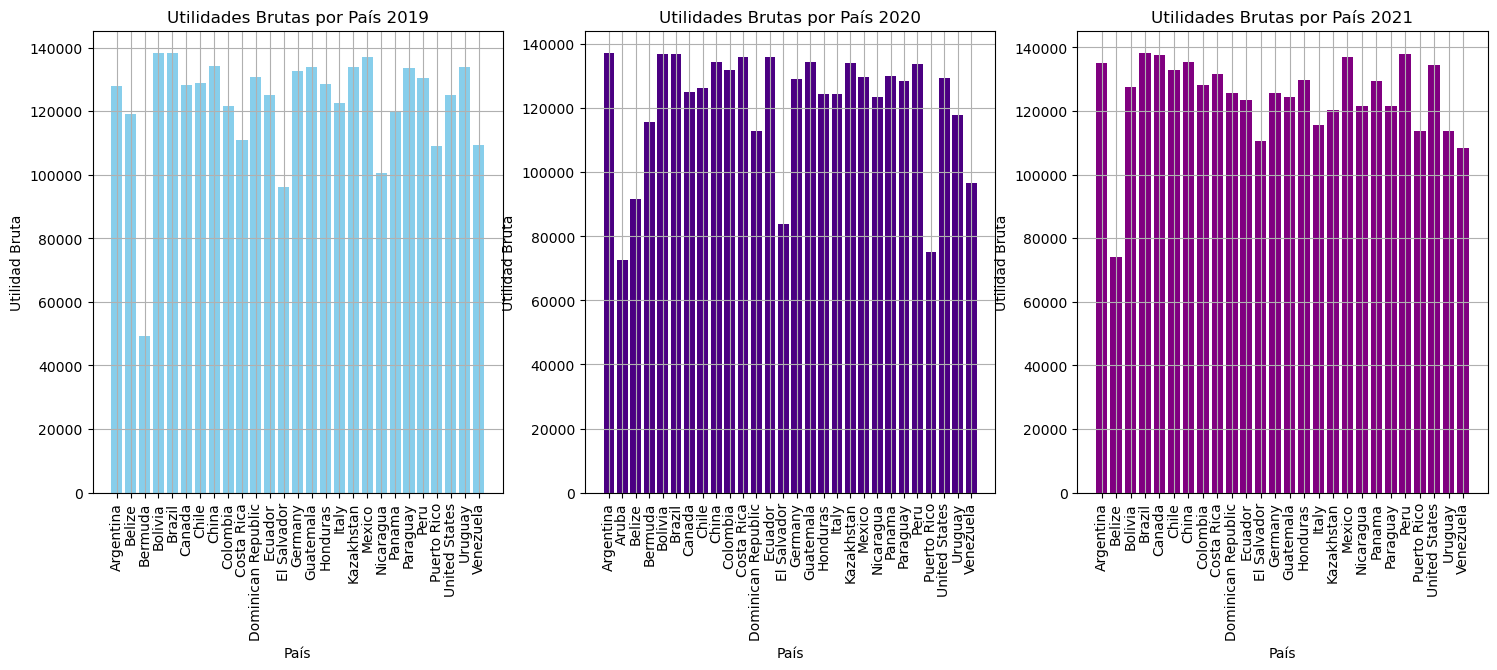

In [187]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].bar(df_2019['pais'], df_2019['utilidad_bruta'], color='skyblue')
axs[0].set_title('Utilidades Brutas por País 2019')
axs[0].set_xlabel('País')
axs[0].set_ylabel('Utilidad Bruta')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(True)

axs[1].bar(df_2020['pais'], df_2020['utilidad_bruta'],  color='indigo')
axs[1].set_title('Utilidades Brutas por País 2020')
axs[1].set_xlabel('País')
axs[1].set_ylabel('Utilidad Bruta')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(True)

axs[2].bar(df_2021['pais'], df_2021['utilidad_bruta'],  color='purple')
axs[2].set_title('Utilidades Brutas por País 2021')
axs[2].set_xlabel('País')
axs[2].set_ylabel('Utilidad Bruta')
axs[2].tick_params(axis='x', rotation=90)
axs[2].grid(True)

#### Grafico de dispersión de utilidades por país

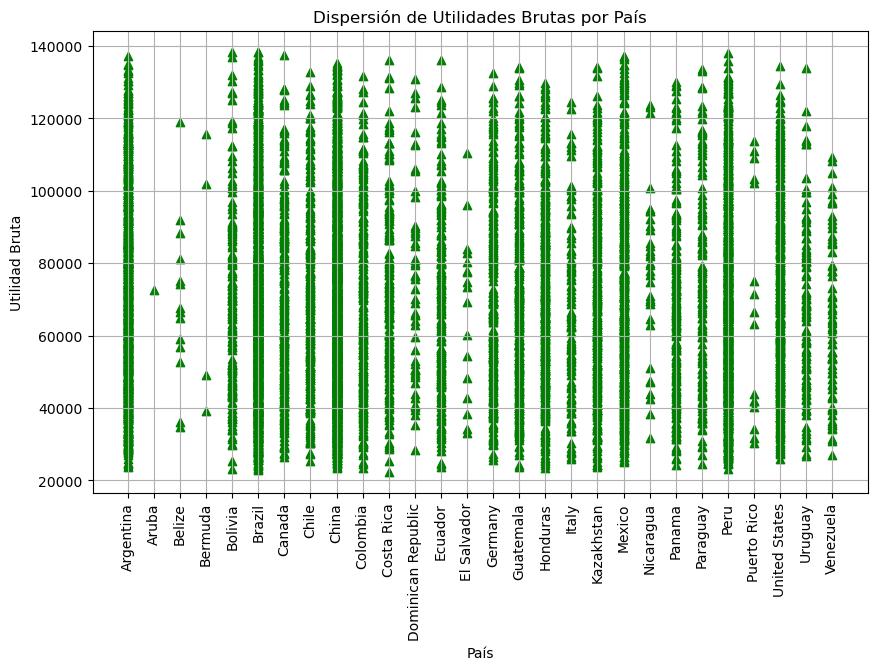

In [188]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sort['pais'], df_sort['utilidad_bruta'], marker = "^", c = "green")
plt.title('Dispersión de Utilidades Brutas por País')
plt.xlabel('País')
plt.ylabel('Utilidad Bruta')
plt.xticks(rotation=90)  
plt.grid(True)
plt.show()

#### Gráfico  por país

<Figure size 1200x800 with 0 Axes>

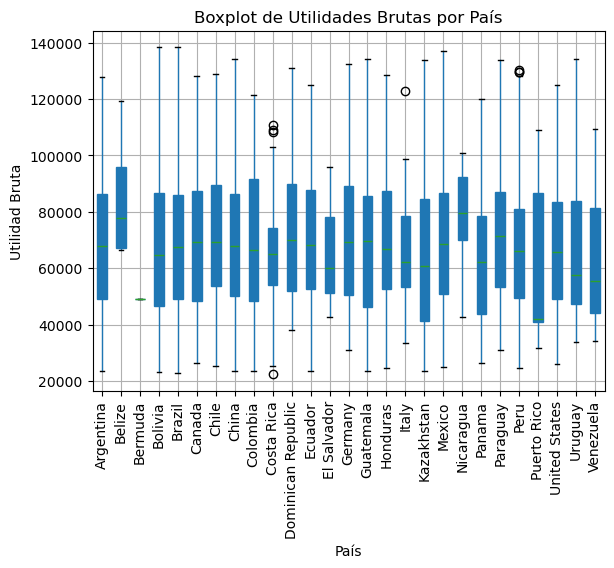

In [189]:
plt.figure(figsize=(12, 8))
df_2019.boxplot(column='utilidad_bruta', by='pais', grid=True, rot=90, vert=True, patch_artist=True)
plt.title('Boxplot de Utilidades Brutas por País')
plt.suptitle('')
plt.xlabel('País')
plt.ylabel('Utilidad Bruta')
plt.show()

### Grafico de Torta Utilidades Brutas por Tipo de comercio

In [190]:
df_sort['utilidad_bruta'] = df_sort['utilidad_bruta'].replace({'\$': '', ',': ''}, regex=True).astype(float)

Es necesario agrupar los datos por "tipo_producto" y sumar los valores de "utilidad bruta" para cada tipo de producto. Luego, usa estos datos agrupados para crear un gráfico de torta, ya que de lo contrario se obtiene un gráfico que incluye una rebanada para cada fila del DataFrame original, lo que resulta en un gráfico de torta con demasiadas rebanadas pequeñas y difíciles de interpretar

In [191]:
df_grouped = df_sort_TC.groupby('tipo_producto')['utilidad_bruta'].sum().reset_index()

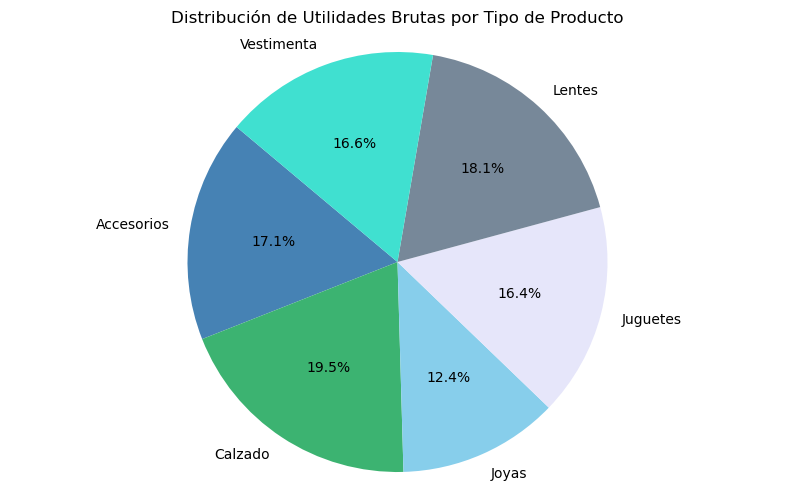

In [192]:
plt.figure(figsize=(10, 6))
plt.pie(df_grouped['utilidad_bruta'], labels=df_grouped['tipo_producto'], autopct='%1.1f%%', startangle=140, colors = ['SteelBlue', 'MediumSeaGreen', 'SkyBlue', 'Lavender', 'LightSlateGray', 'Turquoise'])
plt.title('Distribución de Utilidades Brutas por Tipo de Producto')
plt.axis('equal') 
plt.show()


In [193]:
df_sort.value_counts("pais")

pais
China                 2623
Brazil                2146
Peru                  1394
Argentina             1238
Mexico                 592
United States          453
Honduras               448
Guatemala              344
Kazakhstan             330
Colombia               273
Canada                 271
Chile                  266
Germany                264
Ecuador                213
Panama                 203
Costa Rica             192
Bolivia                173
Paraguay               141
Italy                  113
Uruguay                107
Venezuela               76
Dominican Republic      54
Nicaragua               34
El Salvador             17
Puerto Rico             16
Belize                  14
Bermuda                  4
Aruba                    1
Name: count, dtype: int64

# Export

In [194]:
df_sort.to_csv("Datos/ord_pais.csv")

### Insertamos errores para poder cumplir con la consigna
#### Trabajo el dataset con errores y proponemos soluciones

In [195]:
df = pd.read_csv("dirty_ds_ventas.csv")

#### Como el data set es muy extenso primero vamos a filtrar los valores Nan por cada fila:

In [196]:
filas_con_nan = df[df.isna().any(axis = 1)]
filas_con_nan

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
212,Brazil,NaN,De proximidad,Mujer,Lentes,Eolophus roseicapillus,2019.0,C1 2019,"$123.241,30",5711.0,"40,56%","$49.982,92","$73.258,38"
341,Chile,Representante,Hipermercado,Mujer,NaN,Butorides striatus,2019.0,C1 2019,"$177.202,04",13532.0,"72,69%","$128.813,75","$48.388,29"
458,China,Teléfono,Grandes Almacenes,Infantil,NaN,Bassariscus astutus,2019.0,C1 2019,"$161.010,43",13335.0,"61,21%","$98.547,87","$62.462,56"
1442,China,Website,Especializado,Hombre,Calzado,Ceratotherium simum,2019.0,C2 2019,NaN,NaN,NaN,NaN,NaN
2598,China,Website,Especializado,Mascotas,NaN,Megaderma spasma,2019.0,C3 2019,"$178.536,66",9191.0,"70,73%","$126.275,41","$52.261,25"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11096,Argentina,Teléfono,Hipermercado,Unisex,Calzado,NaN,2021.0,C4 2021,"$119.446,04",6451.0,"32,73%","$39.089,50","$80.356,54"
11124,NaN,MercadoLibre,Grandes Almacenes,Mascotas,Lentes,Mazama gouazoubira,2021.0,C4 2021,"$102.772,84",4960.0,"55,42%","$56.959,92","$45.812,92"
11197,Brazil,NaN,De proximidad,Adultos,Accesorios,Spermophilus parryii,2021.0,C4 2021,"$144.984,17",11740.0,"75,31%","$109.192,82","$35.791,35"
11706,Honduras,Representante,Grandes Almacenes,Infantil,Calzado,Myiarchus tuberculifer,2021.0,C4 2021,NaN,14913.0,NaN,NaN,NaN


#### Si queremos ver todas las filas en jupyter notebook debemos configurar pandas:

In [197]:
#pd.set_option('display.max_rows',None)

#### En el contexto de nuestros datos y la cantidad que tenemos, decidimos eliminar los registros que contienen datos 'Nan' ya que la ausencia de estos hace que la trazabilidad de cualquier registro sea muy dificil y al momento de realizar medidas descriptivas podrían distorcionar los datos de manera grosera. ademas de eso 65/12000 registros nos da 0,0054. es decir ni 1% de los datos afectados

In [198]:
df1 = df.dropna()

In [199]:
filas_con_nan = df1[df1.isna().any(axis = 1)]
filas_con_nan

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos


#### También observamos que la columna [serie] año esta como tipo de dato flotante y deberia ser entero, por lo tanto lo pasamos a Nro entero:

In [200]:
df1.loc[:,'año'] = df1['año'].astype(int)   # todas las filas, columna 'año' parsearlo a int
df1

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
0,Argentina,Representante,Mayorista,Mascotas,Juguetes,Anitibyx armatus,2019.0,C1 2019,"$155.040,02",15562.0,"41,19%","$63.864,63","$91.175,39"
1,Argentina,Mail,De proximidad,Mascotas,Juguetes,Sarcorhamphus papa,2019.0,C1 2019,"$144.314,49",1534.0,"57,57%","$83.084,42","$61.230,07"
2,Argentina,Teléfono,Grandes Almacenes,Infantil,Calzado,Oreamnos americanus,2019.0,C1 2019,"$114.380,59",4036.0,"57,42%","$65.680,44","$48.700,15"
3,Argentina,Website,Especializado,Hombre,Calzado,Zosterops pallidus,2019.0,C1 2019,"$144.097,85",991.0,"27,39%","$39.475,34","$104.622,51"
4,Argentina,Website,Especializado,Adultos,Vestimenta,Dusicyon thous,2019.0,C1 2019,"$110.570,62",4679.0,"68,42%","$75.654,42","$34.916,20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12009,Uruguay,Website,Hipermercado,Mascotas,Accesorios,Sciurus vulgaris,2021.0,C4 2021,"$173.752,28",7249.0,"57,33%","$99.610,76","$74.141,52"
12010,Uruguay,Especial,Especializado,Infantil,Juguetes,Eubalaena australis,2021.0,C4 2021,"$101.345,37",13210.0,"54,99%","$55.727,08","$45.618,29"
12011,Venezuela,Website,Grandes Almacenes,Infantil,Calzado,Colaptes campestroides,2021.0,C4 2021,"$101.967,41",10356.0,"61,16%","$62.365,65","$39.601,76"
12012,Venezuela,Teléfono,Especializado,Mujer,Juguetes,Chordeiles minor,2021.0,C4 2021,"$105.556,48",9532.0,"43,85%","$46.283,85","$59.272,63"


#### Veamos si en nuestro Data Set hay duplicados:

In [201]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12009    False
12010    False
12011    False
12012    False
12013    False
Length: 12014, dtype: bool

#### como vemos si hay filas duplicadas, vamos a mostrarlas:

In [202]:
filas_duplicadas = df1[df.duplicated(keep = False)] 
print(filas_duplicadas)

                pais   metodo_orden      tipo_comercio     linea  \
10         Argentina  Representante      De proximidad  Mascotas   
11         Argentina  Representante      De proximidad  Mascotas   
1972   United States        Website          Mayorista  Mascotas   
1973   United States        Website          Mayorista  Mascotas   
2001   United States        Website          Mayorista  Mascotas   
2002         Uruguay       Teléfono      De proximidad    Hombre   
2009         Uruguay       Teléfono      De proximidad    Hombre   
3498           China           Mail      De proximidad   Adultos   
3499           China           Mail      De proximidad   Adultos   
7088       Venezuela           Mail          Mayorista   Adultos   
7091       Venezuela           Mail          Mayorista   Adultos   
7848            Peru           Mail      De proximidad  Mascotas   
7871            Peru           Mail      De proximidad  Mascotas   
7908            Peru           Mail      De prox

C:\Users\Admin\AppData\Local\Temp\ipykernel_22372\2252995362.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filas_duplicadas = df1[df.duplicated(keep = False)]


In [203]:
filas_duplicadas = df1.duplicated().sum()
print(filas_duplicadas)

14


#### Hay 14 filas que se duplican, claro esta que estas aportan redundancia que no queremos. entonces las eliminamos.

In [205]:
df1.drop_duplicates(inplace = True)
df1

C:\Users\Admin\AppData\Local\Temp\ipykernel_22372\3767664479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace = True)


,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
0,Argentina,Representante,Mayorista,Mascotas,Juguetes,Anitibyx armatus,2019.0,C1 2019,"$155.040,02",15562.0,"41,19%","$63.864,63","$91.175,39"
1,Argentina,Mail,De proximidad,Mascotas,Juguetes,Sarcorhamphus papa,2019.0,C1 2019,"$144.314,49",1534.0,"57,57%","$83.084,42","$61.230,07"
2,Argentina,Teléfono,Grandes Almacenes,Infantil,Calzado,Oreamnos americanus,2019.0,C1 2019,"$114.380,59",4036.0,"57,42%","$65.680,44","$48.700,15"
3,Argentina,Website,Especializado,Hombre,Calzado,Zosterops pallidus,2019.0,C1 2019,"$144.097,85",991.0,"27,39%","$39.475,34","$104.622,51"
4,Argentina,Website,Especializado,Adultos,Vestimenta,Dusicyon thous,2019.0,C1 2019,"$110.570,62",4679.0,"68,42%","$75.654,42","$34.916,20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12009,Uruguay,Website,Hipermercado,Mascotas,Accesorios,Sciurus vulgaris,2021.0,C4 2021,"$173.752,28",7249.0,"57,33%","$99.610,76","$74.141,52"
12010,Uruguay,Especial,Especializado,Infantil,Juguetes,Eubalaena australis,2021.0,C4 2021,"$101.345,37",13210.0,"54,99%","$55.727,08","$45.618,29"
12011,Venezuela,Website,Grandes Almacenes,Infantil,Calzado,Colaptes campestroides,2021.0,C4 2021,"$101.967,41",10356.0,"61,16%","$62.365,65","$39.601,76"
12012,Venezuela,Teléfono,Especializado,Mujer,Juguetes,Chordeiles minor,2021.0,C4 2021,"$105.556,48",9532.0,"43,85%","$46.283,85","$59.272,63"


#### Comprobamos nuevamente y vemos que las filas duplicadas se han eliminado:

In [206]:
filas_duplicadas = df1.duplicated().sum()
filas_duplicadas

0

#### Grafico de barras teniendo en cuenta las ventas por variable categorica 'Pais'

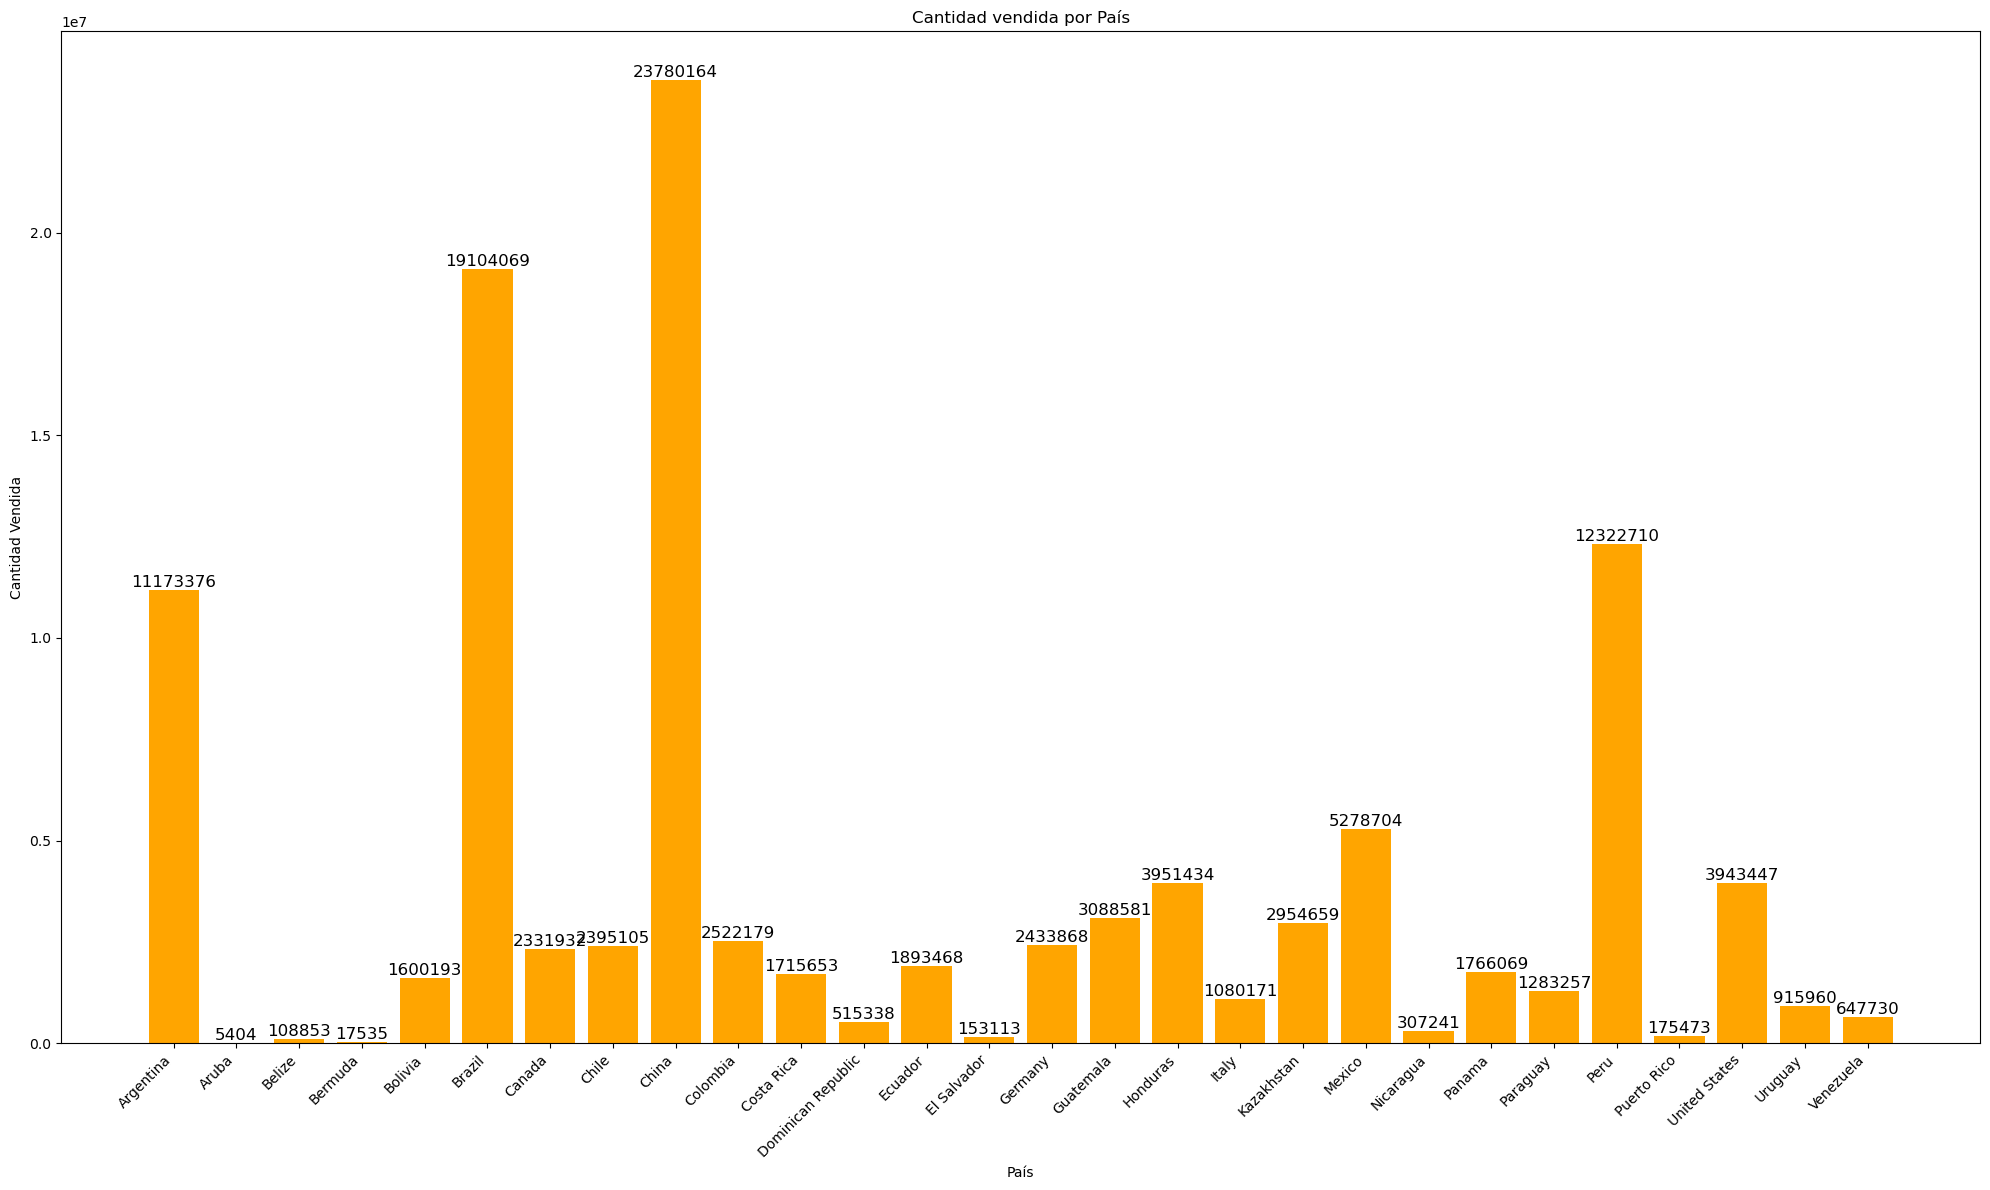

In [207]:
Ventas_por_Pais=df1.groupby("pais")['cantidad'].sum().reset_index()
# el reset index me agrega indices por defecto al sub data set que se forma

plt.figure(figsize = (20,12))
bars = plt.bar(Ventas_por_Pais['pais'], Ventas_por_Pais['cantidad'], color = 'orange')

# Etiquetas de datos:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)
    
plt.xlabel('País')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad vendida por País')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout() 
plt.show()

### Verificacion de errores en los datos:

Se verifica si hay  valores que sean igual o menor a $0 en las columnas utilidad_bruta, costos y ventas:

In [208]:
df[df["utilidad_bruta"] <= '$0']

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos


In [209]:
df[df["costos"] <= '$0']

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos


In [210]:
df[df["ventas"] <= '$0']

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
279,Brazil,Website,Hipermercado,Mujer,Lentes,Theropithecus gelada,2019.0,C1 2019,$0,8975.0,"35,08%","$42.327,59","$78.344,34"
1310,Canada,Teléfono,Mayorista,Adultos,Vestimenta,Meles meles,2019.0,C2 2019,$0,8642.0,"43,12%","$69.208,17","$91.293,09"
1326,Canada,Teléfono,De proximidad,Mascotas,Lentes,Equus hemionus,2019.0,C2 2019,$0,2313.0,"57,59%","$87.032,38","$64.091,72"
1427,China,Representante,Mayorista,Hombre,Calzado,Tayassu pecari,2019.0,C2 2019,$0,9066.0,"50,75%","$50.038,69","$48.555,31"
5619,Colombia,Mail,Mayorista,Adultos,Juguetes,Orcinus orca,2020.0,C2 2020,$0,15602.0,"61,11%","$56.333,10","$35.856,95"
10621,Dominican Republic,Teléfono,Hipermercado,Infantil,Juguetes,Eubalaena australis,2021.0,C3 2021,$0,9821.0,"32,66%","$49.538,27","$102.150,75"


Se verifican Valores en $0 en la columna Ventas

#### Solución: Borrar registros

In [211]:
df.drop(df[df["ventas"] <= '$0'].index, inplace=True)

#### Se encontraron valores negativos en el campo "cantidad"

In [212]:
df[df["cantidad"] <= 0]

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
1381,China,Website,Grandes Almacenes,Mujer,Lentes,Otaria flavescens,2019.0,C2 2019,"$120.890,74",-9049.0,"32,57%","$39.377,94","$81.512,80"
5710,Guatemala,Teléfono,De proximidad,Adultos,Juguetes,Chordeiles minor,2020.0,C2 2020,"$134.923,25",-8224.0,"52,28%","$70.535,51","$64.387,74"
6524,China,Representante,De proximidad,Adultos,Joyas,Meles meles,2020.0,C3 2020,"$160.522,28",-7081.0,"30,54%","$49.031,25","$111.491,03"
7728,Honduras,Especial,Hipermercado,Infantil,Joyas,Rhea americana,2020.0,C4 2020,"$115.865,24",-4918.0,"54,79%","$63.478,29","$52.386,95"
7803,Mexico,MercadoLibre,Grandes Almacenes,Unisex,Lentes,Gazella thompsonii,2020.0,C4 2020,"$104.285,94",-7309.0,"59,11%","$61.648,07","$42.637,87"


#### Solución: setearlos con su valor opuesto

In [220]:
df.loc[df["cantidad"] <= 0, "cantidad"] *= -1
df[df["cantidad"] <= 0]

,pais,metodo_orden,tipo_comercio,linea,tipo_producto,producto,año,cuatrimestre,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos


Se verifica que ya no hay valores iguales o menores a  0

## Vamos a tratar de analizar el sesgo de los datos de utilidad_bruta

In [231]:
df2 = df1.iloc[:,[8,9,10,11,12]] # subset de variables numericas

In [232]:
df2

,ventas,cantidad,utilidad_bruta_p,utilidad_bruta,costos
0,"$155.040,02",15562.0,"41,19%","$63.864,63","$91.175,39"
1,"$144.314,49",1534.0,"57,57%","$83.084,42","$61.230,07"
2,"$114.380,59",4036.0,"57,42%","$65.680,44","$48.700,15"
3,"$144.097,85",991.0,"27,39%","$39.475,34","$104.622,51"
4,"$110.570,62",4679.0,"68,42%","$75.654,42","$34.916,20"
...,...,...,...,...,...
12009,"$173.752,28",7249.0,"57,33%","$99.610,76","$74.141,52"
12010,"$101.345,37",13210.0,"54,99%","$55.727,08","$45.618,29"
12011,"$101.967,41",10356.0,"61,16%","$62.365,65","$39.601,76"
12012,"$105.556,48",9532.0,"43,85%","$46.283,85","$59.272,63"


In [233]:
df2['utilidad_bruta'] = df2['utilidad_bruta'].str.replace('$', '')

df2['utilidad_bruta'] = df2['utilidad_bruta'].str.replace('.', '')

df2['utilidad_bruta'] = df2['utilidad_bruta'].str.replace(',', '.')

df2['utilidad_bruta_p'] = df2['utilidad_bruta_p'].str.replace('%','')
df2['utilidad_bruta_p'] = df2['utilidad_bruta_p'].str.replace(',','.')

df2['utilidad_bruta'] = df2['utilidad_bruta'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22372\1103725186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['utilidad_bruta'] = df2['utilidad_bruta'].str.replace('$', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_22372\1103725186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['utilidad_bruta'] = df2['utilidad_bruta'].str.replace('.', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_22372\1103725186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


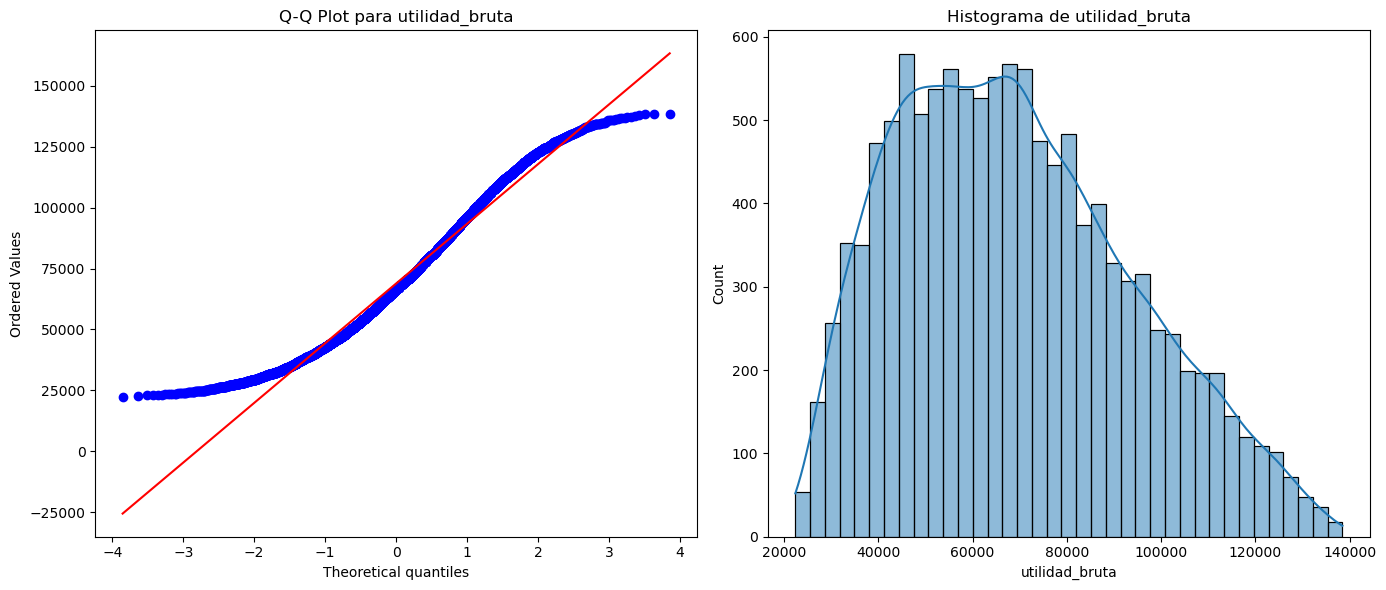

In [228]:
datos = df2['utilidad_bruta']
    
# creamos un Q-Q plot
plt.figure(figsize=(14,6))
    
plt.subplot(1,2,1)
probplot(datos, dist ="norm", plot=plt)
plt.title("Q-Q Plot para utilidad_bruta")
    
#creamos un histograma
    
plt.subplot(1,2,2)
sns.histplot(datos, kde = True)
plt.title("Histograma de utilidad_bruta")
    
plt.tight_layout()
plt.show()

#### vemos que los  datos tienen un sesgo a la derecha, pero tienen una agrupacion cerca de la media, de todas formas claramente no es una distribucion normal ya que si fuera asi los datos no se despegarian tanto de la linea normal en el Q-Q plot pero tienen una buena agrupacion respecto a la media q era de $6887905.84